## Letalidade policial em São Paulo

**Autores:** Andressa Freires e Rodolfo Viana

---

#### INTRODUÇÃO

Elaborado para a oficina _Python para jornalistas_, evento do _2º Domingo de dados_ da Abraji, o presente trabalho busca emular uma análise exploratória feita com Python, cujos resultados poderiam subsidiar (ou descartar) uma pauta imaginada pela redação.

Para esta análise, tomamos a temática "letalidade policial no estado de São Paulo". Destrincharemos dados públicos para entender:

1. se houve evolução no número de mortes por intervenção da policia militar no decorrer dos anos;

2. em quais cidades do estado essa evolução se apresenta de maneira mais clara;

3. qual é o perfil das vítimas fatais da PM.

Considerando o tempo dedicado à oficina (2 horas), algumas licenças foram tomadas pelos autores. São elas:

1. a análise compreenderá os primeiros semestres de 2018, 2019 e 2020 -- o ideal seria trabalhar com um período mais abrangente;

2. a base utilizada foi previamente formatada, seguindo a metodologia sugerida pela Secretaria de Segurança Pública de São Paulo -- no trabalho real, esta tarefa caberia ao jornalista de dados;

3. a base compreende apenas óbitos decorrentes de intervenção de policial militar em serviço -- para uma reportagem, o ideal seria ter também os casos ocorridos com policiais militares fora de serviço.

Duas bases reais foram utilizadas neste trabalho:

1. Morte decorrente de intervenção policial, SSP-SP, [link](http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx)

2. População, Fundação Seade, [link](http://www.imp.seade.gov.br/frontend/#/tabelas)

#### CONFIGURAÇÃO E CARREGAMENTO

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
%matplotlib inline

> `import` é o comando usado para carregar uma biblioteca. Aqui carregamos duas: Pandas (para ler as bases) e Matplotlib (para gerar gráficos).
>
> Mas para não ter de repetir os nomes das bibliotecas sempre que elas forem utilizadas, damos apelidos com `as`. Então, `import pandas as pd` indica que, sempre que chamarmos `pd`, estaremos nos referindo a `pandas`. Já `import matplotlib.pyplot as plt` indica que, sempre que `plt` for usado, estaremos fazendo referência ao módulo `pyplot` de `matplotlib`.
>
> Em seguinda, configuramos Pandas para mostrar todas as colunas e linhas quando forem criadas as tabelas (aqui chamadas de _dataframes_ ou simplesmente _df_). Por padrão, Pandas mostra uma quantidade limitada de linhas e colunas nos dataframes, mas queremos ver todas. Isso foi feito com `pd.set_option('display.max_columns', None)` e `pd.set_option('display.max_rows', None)`.
>
> Também usamos um comando para mostrar gráficos no próprio notebook, e não fora dele. Isso é feito configurando a biblioteca Matplotlib, com `%matplotlib inline`.

In [2]:
obitos = pd.read_csv('../data/obitos.csv')

populacao = pd.read_csv('../data/populacao.csv')

> `pandas.read_csv('caminho_do_arquivo')` é o comando usado para ler um arquivo `.csv` e transformá-lo num formato "padrão" para trabalhar com Pandas: o dataframe.
>
> Como atribuímos uma variável a isso (no caso do arquivo de mortes, a variável é `obitos`; no de população, `populacao`), cada vez que chamarmos a variável, estaremos nos referindo ao arquivo.
>
> Observação: Repare que usamos `pd.read_csv` em vez de `pandas.read_csv`. Isso porque, no `import`, demos a `pandas` o "apelido" `pd`.

#### CHECAGEM DOS DADOS

In [3]:
obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO_BO                   1089 non-null   int64  
 1   NUM_BO                   1089 non-null   int64  
 2   NUMERO_BOLETIM           1089 non-null   object 
 3   BO_INICIADO              1089 non-null   object 
 4   BO_EMITIDO               1089 non-null   object 
 5   DATAOCORRENCIA           1089 non-null   object 
 6   HORAOCORRENCIA           1064 non-null   object 
 7   PERIDOOCORRENCIA         1089 non-null   object 
 8   DATACOMUNICACAO          1089 non-null   object 
 9   DATAELABORACAO           1089 non-null   object 
 10  BO_AUTORIA               1089 non-null   object 
 11  FLAGRANTE                1089 non-null   object 
 12  LOGRADOURO               898 non-null    object 
 13  NUMERO                   1089 non-null   int64  
 14  BAIRRO                  

Agora que carregamos os dados dos dois arquivos, precisamos ver como eles estão, saber quais os tipos (texto? número inteiro? número decimal? etc.) de cada coluna, saber os nomes das colunas...

Acima, fizemos isso com o dataframe `obitos`.

> `df.info()` traz informações sobre o dataframe (que, no nosso caso, chama `obitos`).
>
> Vemos, por exemplo, que essa base tem 1089 registros; que há seis colunas com `float` ou `int` (números) e trinta com `object` (texto); que há colunas com registro de ano, nome da pessoa, cor, cidade etc.
>
> Vemos também que algumas colunas têm valores nulos -- ou seja, o total de registros menos a quantidade `non_null`. Isso pode ser um problema em algumas análises.

In [4]:
obitos.iloc[0]

ANO_BO                                                2018
NUM_BO                                                   1
NUMERO_BOLETIM                                      1/2018
BO_INICIADO                               2018-01-01 03:36
BO_EMITIDO                                2018-01-01 08:31
DATAOCORRENCIA                                  2017-12-31
HORAOCORRENCIA                                    22:58:00
PERIDOOCORRENCIA                                   A NOITE
DATACOMUNICACAO                                 2018-01-01
DATAELABORACAO                            2018-01-01 03:36
BO_AUTORIA                                       Conhecida
FLAGRANTE                                              Não
LOGRADOURO                     RUA FRANCISCO DE SOUTOMAIOR
NUMERO                                                 450
BAIRRO                                             LAJEADO
CIDADE                                           SÃO PAULO
LATITUDE                                          -23.52

> `df.iloc[n]` mostra o registro contido na linha `n`.
>
> No comando acima, observamos o registro que está na primeira linha -- `0` -- do dataframe chamado `obitos`. Por isso usamos `obitos.iloc[0]`.

In [5]:
obitos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,NUMERO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,NOMEPESSOA,TIPOPESSOA,NATURALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS
0,2018,1,1/2018,2018-01-01 03:36,2018-01-01 08:31,2017-12-31,22:58:00,A NOITE,2018-01-01,2018-01-01 03:36,Conhecida,Não,RUA FRANCISCO DE SOUTOMAIOR,450,LAJEADO,SÃO PAULO,-23.525707,-46.389973,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,67º D.P. JARDIM ROBRU,Ato infracional,A.I.-Roubo (art. 157) - VEICULO,NaN,EDIOMAR ERIC DOS SANTOS,Vítima,S.PAULO -SP,Masculino,2000-05-18,17,Solteiro,ESTUDANTE,1 Grau incompleto,Parda
1,2018,1,1/2018,2018-01-01 03:36,2018-01-01 08:31,2017-12-31,22:58:00,A NOITE,2018-01-01,2018-01-01 03:36,Conhecida,Não,RUA FRANCISCO DE SOUTOMAIOR,450,LAJEADO,SÃO PAULO,-23.525707,-46.389973,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,67º D.P. JARDIM ROBRU,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),Morte decorrente de intervenção policial (RES....,PEDRO HENRIQUE NASCIMENTO CHENK,Vítima,S.PAULO -SP,Masculino,2001-06-04,16,Solteiro,ESTUDANTE,NaN,Parda
2,2018,1,1/2018,2018-01-01 03:36,2018-01-01 08:31,2017-12-31,22:58:00,A NOITE,2018-01-01,2018-01-01 03:36,Conhecida,Não,RUA FRANCISCO DE SOUTOMAIOR,450,LAJEADO,SÃO PAULO,-23.525707,-46.389973,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,67º D.P. JARDIM ROBRU,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),Morte decorrente de intervenção policial (RES....,PETERSON EVANGELISTA FERREIRA,Autor/Vitima,FERRAZ DE VASCONCELOS/SP,Masculino,1997-05-26,20,Solteiro,ESTUDANTE,NaN,Parda
3,2018,3,3/2018,2018-01-02 19:42,2018-01-03 02:41,2018-01-02,16:26:00,A TARDE,2018-01-02,2018-01-02 19:42,Conhecida,Não,RUA FREDERIC MISTRAL,515,CIDADE DUTRA,SÃO PAULO,-23.737003,-46.715877,Favela,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,101º D.P. JDIM IMBUIAS,L 10826/03 - Estatuto do Desarmamento,Disparo de arma de fogo (Art. 15),NaN,NaN,Autor/Vitima,NaN,Masculino,NaN,0,NaN,NaN,NaN,Parda
4,2018,4,4/2018,2018-01-03 17:21,2018-01-03 19:13,2018-01-03,14:45:00,A TARDE,2018-01-03,2018-01-03 17:21,Conhecida,Não,RODOVIA BR 381,80,TREMEMBE,SÃO PAULO,-23.417213,-46.579903,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,73º D.P. JACANA,L 10826/03 - Estatuto do Desarmamento,Porte ilegal de arma de fogo de uso permitido ...,NaN,NaN,Autor/Vitima,NaN,Masculino,NaN,0,NaN,NaN,NaN,Parda


> `df.head(n)` mostra os `n` registros do começo do dataframe. 
>
> Ou seja, `obitos.head(5)` retorna as cinco primeiras linhas do dataframe `obitos`.

In [6]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  1935 non-null   object
 1   ano        1935 non-null   int64 
 2   populacao  1935 non-null   int64 
 3   cod_ibge   1935 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 60.6+ KB


In [7]:
populacao.iloc[0]

municipio    ADAMANTINA
ano                2018
populacao         33888
cod_ibge        3500105
Name: 0, dtype: object

In [8]:
populacao.head(5)

,municipio,ano,populacao,cod_ibge
0,ADAMANTINA,2018,33888,3500105
1,ADAMANTINA,2019,33891,3500105
2,ADAMANTINA,2020,33894,3500105
3,ADOLFO,2018,3469,3500204
4,ADOLFO,2019,3458,3500204


Observados os dataframes `obitos` e `populacao`, passamos à análise.

### ANÁLISE

Antes, vamos pontuar algo que observamos: cada linha de `obito` é uma pessoa morta por um policial militar em serviço. 

Pela lógica, **a quantidade de linhas representa a quantidade de pessoas mortas**.

Isso significa, por exemplo, que, agrupando os registros por ano e contando as linhas, teremos a quantidade de mortos no primeiro semestre de cada ano.

Vamos ver onde isso nos leva...

In [9]:
obitos.groupby('ANO_BO').size()

ANO_BO
2018    312
2019    341
2020    436
dtype: int64

> Usamos `obitos.groupby('ANO_BO')` porque queremos agrupar (`groupby()`) os dados do dataframe `obitos` pela variável `ANO_BO`.
>
> Seguindo a lógica, se quiséssemos agrupar, digamos, pela cor da vítima, usaríamos `obitos.groupby('CORCUTIS')`; pela cidade, `obitos.groupby('CIDADE')`, e assim por diante.
> 
> Porém, além de `groupby()`, usamos a função `size()`. Ela retorna a quantidade de linhas -- e, no nosso caso, linhas representam mortos.
>
> Desta forma, `obitos.groupby('ANO_BO').size()`é um comando para agrupar (por `ANO_BO`) e contar quantas linhas (ou quantos mortos) há para cada `ANO_BO`.

O primeiro semestre de 2020 é o que registra mais óbitos por intervenção policial, em comparação ao mesmo período de anos anteriores.

Mas qual é o aumento de 2020 em relação a 2019, em porcentagem?

In [10]:
obitos.groupby('ANO_BO').size().pct_change()

ANO_BO
2018         NaN
2019    0.092949
2020    0.278592
dtype: float64

> O comando `pct_change()` mostra a mudança percentual entre um valor e o seu antecessor.
>
> Neste caso, `pct_change()` compara a quantidade de registros (`size()`) de 2018 com nada (pois nada o antecede, daí o resultado `NaN`, vazio), 2019 com 2018 e 2020 com 2019

Observamos que tivermos um aumento de 9,29% no número de mortes por policiais comparando os primeiros semestres de 2018 e de 2019.

Esse aumento foi ainda maior entre os primeiros semestres de 2019 e de 2020: 27,86%.

Além de comparar os números por anos, é possível comparar entre as cidades. Para isso temos o dataframe `populacao`, com dados da população de cada município paulista nos anos de 2018, 2019 e 2020.

Precisamos, portanto, vincular os dois dataframes.

In [11]:
df = pd.merge(
    obitos, populacao, 
    left_on=['CIDADE', 'ANO_BO'], 
    right_on=['municipio', 'ano']
)

> `pd.merge()` é a função para vincular, juntar dois dataframes. Aqui, `obitos` e `populacao`.
>
> Mas essa junção não pode ser aleatória. É preciso que haja pelo menos um elo entre os dois dataframes -- caso contrário, na nossa análise, seria capaz de a população de São Paulo ser atribuída ao município de Borá, o que seria catastrófico.
>
> Olhando novamente os dois dataframes, notamos que há duas colunas comuns, dois elos, apesar de os nomes serem diferentes: cidade (que chama `CIDADE` em `obitos` e `municipio` em `populacao`) e ano (`ANO_BO` em `obitos` e `ano` em `populacao`).
>
> Precisamos, então, avisar `pd.merge()` quais são esses elos. Fazemos isso com `left_on` (ou seja, as colunas do primeiro dataframe) e `right_on` (variáveis do segundo).
>
> O resultado dessa operação de junção é salva na variável `df`.

In [12]:
df.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,LOGRADOURO,NUMERO,BAIRRO,CIDADE,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,NOMEPESSOA,TIPOPESSOA,NATURALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,municipio,ano,populacao,cod_ibge
0,2018,1,1/2018,2018-01-01 03:36,2018-01-01 08:31,2017-12-31,22:58:00,A NOITE,2018-01-01,2018-01-01 03:36,Conhecida,Não,RUA FRANCISCO DE SOUTOMAIOR,450,LAJEADO,SÃO PAULO,-23.525707,-46.389973,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,67º D.P. JARDIM ROBRU,Ato infracional,A.I.-Roubo (art. 157) - VEICULO,NaN,EDIOMAR ERIC DOS SANTOS,Vítima,S.PAULO -SP,Masculino,2000-05-18,17,Solteiro,ESTUDANTE,1 Grau incompleto,Parda,SÃO PAULO,2018,11753659,3550308
1,2018,1,1/2018,2018-01-01 03:36,2018-01-01 08:31,2017-12-31,22:58:00,A NOITE,2018-01-01,2018-01-01 03:36,Conhecida,Não,RUA FRANCISCO DE SOUTOMAIOR,450,LAJEADO,SÃO PAULO,-23.525707,-46.389973,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,67º D.P. JARDIM ROBRU,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),Morte decorrente de intervenção policial (RES....,PEDRO HENRIQUE NASCIMENTO CHENK,Vítima,S.PAULO -SP,Masculino,2001-06-04,16,Solteiro,ESTUDANTE,NaN,Parda,SÃO PAULO,2018,11753659,3550308
2,2018,1,1/2018,2018-01-01 03:36,2018-01-01 08:31,2017-12-31,22:58:00,A NOITE,2018-01-01,2018-01-01 03:36,Conhecida,Não,RUA FRANCISCO DE SOUTOMAIOR,450,LAJEADO,SÃO PAULO,-23.525707,-46.389973,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,67º D.P. JARDIM ROBRU,Título I - Pessoa (arts. 121 a 154),Homicídio simples (art. 121),Morte decorrente de intervenção policial (RES....,PETERSON EVANGELISTA FERREIRA,Autor/Vitima,FERRAZ DE VASCONCELOS/SP,Masculino,1997-05-26,20,Solteiro,ESTUDANTE,NaN,Parda,SÃO PAULO,2018,11753659,3550308
3,2018,3,3/2018,2018-01-02 19:42,2018-01-03 02:41,2018-01-02,16:26:00,A TARDE,2018-01-02,2018-01-02 19:42,Conhecida,Não,RUA FREDERIC MISTRAL,515,CIDADE DUTRA,SÃO PAULO,-23.737003,-46.715877,Favela,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,101º D.P. JDIM IMBUIAS,L 10826/03 - Estatuto do Desarmamento,Disparo de arma de fogo (Art. 15),NaN,NaN,Autor/Vitima,NaN,Masculino,NaN,0,NaN,NaN,NaN,Parda,SÃO PAULO,2018,11753659,3550308
4,2018,4,4/2018,2018-01-03 17:21,2018-01-03 19:13,2018-01-03,14:45:00,A TARDE,2018-01-03,2018-01-03 17:21,Conhecida,Não,RODOVIA BR 381,80,TREMEMBE,SÃO PAULO,-23.417213,-46.579903,Via pública,IC-IML,BO PARA INQUÉRITO,DHPP DIV. HOMICIDIOS,73º D.P. JACANA,L 10826/03 - Estatuto do Desarmamento,Porte ilegal de arma de fogo de uso permitido ...,NaN,NaN,Autor/Vitima,NaN,Masculino,NaN,0,NaN,NaN,NaN,Parda,SÃO PAULO,2018,11753659,3550308


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1088
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ANO_BO                   1089 non-null   int64  
 1   NUM_BO                   1089 non-null   int64  
 2   NUMERO_BOLETIM           1089 non-null   object 
 3   BO_INICIADO              1089 non-null   object 
 4   BO_EMITIDO               1089 non-null   object 
 5   DATAOCORRENCIA           1089 non-null   object 
 6   HORAOCORRENCIA           1064 non-null   object 
 7   PERIDOOCORRENCIA         1089 non-null   object 
 8   DATACOMUNICACAO          1089 non-null   object 
 9   DATAELABORACAO           1089 non-null   object 
 10  BO_AUTORIA               1089 non-null   object 
 11  FLAGRANTE                1089 non-null   object 
 12  LOGRADOURO               898 non-null    object 
 13  NUMERO                   1089 non-null   int64  
 14  BAIRRO                  

In [14]:
df.iloc[0]

ANO_BO                                                2018
NUM_BO                                                   1
NUMERO_BOLETIM                                      1/2018
BO_INICIADO                               2018-01-01 03:36
BO_EMITIDO                                2018-01-01 08:31
DATAOCORRENCIA                                  2017-12-31
HORAOCORRENCIA                                    22:58:00
PERIDOOCORRENCIA                                   A NOITE
DATACOMUNICACAO                                 2018-01-01
DATAELABORACAO                            2018-01-01 03:36
BO_AUTORIA                                       Conhecida
FLAGRANTE                                              Não
LOGRADOURO                     RUA FRANCISCO DE SOUTOMAIOR
NUMERO                                                 450
BAIRRO                                             LAJEADO
CIDADE                                           SÃO PAULO
LATITUDE                                          -23.52

In [15]:
df = df[['ANO_BO', 'CIDADE', 'IDADE', 'CORCUTIS', 'populacao']]

> Constatamos que `df` terminou com duas variáveis para ano e duas para cidade. Não faz sentido manter colunas repetidas, como também não faz sentido manter colunas que não usaremos para as análises. Por isso restringimos `df` às colunas que queremos. Fazemos isso passando uma lista de colunas (`['ANO_BO', 'CIDADE', 'IDADE', 'CORCUTIS', 'populacao']`) ao recorte de `df` (`df[]`) que queremos.
>
> Temos, portanto, `df[['ANO_BO', 'CIDADE', 'IDADE', 'CORCUTIS', 'populacao']]`.
>
> Aproveitamos para sobrescrever `df`, que agora terá apenas as colunas da lista.

In [16]:
df250 = df[df['populacao'] >= 250000]

> Queremos trabalhar apenas com municípios cuja população seja igual ou superior a 250 mil habitantes -- em código, isso seria escrito assim: `df['populacao'] >= 250000`. 
> 
> Precisamos, então, "fatiar" nosso dataframe. Precisamos dizer que, dos registros de `df`, queremos apenas aqueles que atendam à condição. Ou seja, `df[df['populacao'] >= 250000]`.
>
> O dataframe resultante dessa operação será chamado de `df250`.

In [17]:
df250.head(20)

,ANO_BO,CIDADE,IDADE,CORCUTIS,populacao
0,2018,SÃO PAULO,17,Parda,11753659
1,2018,SÃO PAULO,16,Parda,11753659
2,2018,SÃO PAULO,20,Parda,11753659
3,2018,SÃO PAULO,0,Parda,11753659
4,2018,SÃO PAULO,0,Parda,11753659
5,2018,SÃO PAULO,0,Parda,11753659
6,2018,SÃO PAULO,26,Parda,11753659
7,2018,SÃO PAULO,38,Parda,11753659
8,2018,SÃO PAULO,0,Parda,11753659
9,2018,SÃO PAULO,0,Parda,11753659


In [18]:
df250_consolidado = df250.groupby(['CIDADE', 'ANO_BO']).size().reset_index()

> Além de `groupby()` e `size()`, que já vimos anteriormente, o comando `reset_index()` "formata" os resultados em dataframe, enumerando novamente as linhas.

In [19]:
df250_consolidado.head(20)

,CIDADE,ANO_BO,0
0,BARUERI,2018,3
1,BARUERI,2019,1
2,BARUERI,2020,1
3,BAURU,2018,1
4,BAURU,2019,5
5,BAURU,2020,2
6,CAMPINAS,2018,8
7,CAMPINAS,2019,12
8,CAMPINAS,2020,15
9,CARAPICUÍBA,2018,5


In [20]:
df250_consolidado.rename(columns={0: 'quantidade'}, inplace=True)

> A contagem em `df_250_consolidado` retornou uma coluna chamada `0`, que é a quantidade de mortos para cada cidade e ano. Renomeamos a coluna com `rename(columns={nome antigo: novo nome})`, e usamos `inplace=True` para essa alteração ser no próprio dataframe, sem a necessidade de gerar novo dataframe.

In [21]:
df250_consolidado.head(20)

,CIDADE,ANO_BO,quantidade
0,BARUERI,2018,3
1,BARUERI,2019,1
2,BARUERI,2020,1
3,BAURU,2018,1
4,BAURU,2019,5
5,BAURU,2020,2
6,CAMPINAS,2018,8
7,CAMPINAS,2019,12
8,CAMPINAS,2020,15
9,CARAPICUÍBA,2018,5


In [22]:
graf1 = pd.pivot_table(
    df250_consolidado, 
    values='quantidade', 
    index='CIDADE', 
    columns='ANO_BO'
)

> Fica um tanto complicado fazer comparações com o dataframe da forma como está, com nomes de cidade repetidos (um para cada ano). Também não é a forma ideal para criar gráficos com Matplotlib.
>
> Precisamos mudar disso:
>
> | CIDADE | ANO_BO | quantidade |
> |---|---|---|
> | Cidade A | 2018 | 1 |
> | Cidade A | 2019 | 2 |
> | Cidade A | 2020 | 3 |
> | Cidade B | 2018 | 10 |
> | Cidade B | 2019 | 20 |
> | Cidade B | 2020 | 30 |
>
> Para algo como:
>
> | CIDADE | 2018 | 2019 | 2020 |
> |---|---|---|---|
> | Cidade A | 1 | 2 | 3 |
> | Cidade B | 10 | 20 | 30 |
>
> Para isso, usamos `pivot_table()`, função que rotaciona os dados dentro do dataframe. 
>
> Também precisamos indicar o dataframe (`df250_consolidado`), qual coluna contém os valores (`values='quantidade'`), qual coluna será o índice (`index='CIDADE'`) e em qual coluna ficarão os valores (`columns='ANO_BO'`).
>
> Tudo isso será armazenado na variável `graf1`.

In [23]:
graf1

ANO_BO,2018,2019,2020
CIDADE,,,
BARUERI,3.0,1.0,1.0
BAURU,1.0,5.0,2.0
CAMPINAS,8.0,12.0,15.0
CARAPICUÍBA,5.0,4.0,7.0
DIADEMA,1.0,2.0,4.0
EMBU DAS ARTES,1.0,1.0,3.0
GUARUJÁ,12.0,8.0,15.0
GUARULHOS,17.0,6.0,13.0
ITAQUAQUECETUBA,4.0,5.0,5.0


> A visualização já melhorou: conseguimos ver com mais clareza que Campinas, por exemplo, teve aumento de 2019 para 2020; Bauru, queda...
>
> Mas os números ganharam casa decimal: em vez de `1`, temos `1.0`. Isso é normal quando rotacionamos uma tabela com valores nulos (`NaN`): números inteiros viram pontos flutuantes. Mas não há impacto no cálculo.

<AxesSubplot:xlabel='CIDADE'>

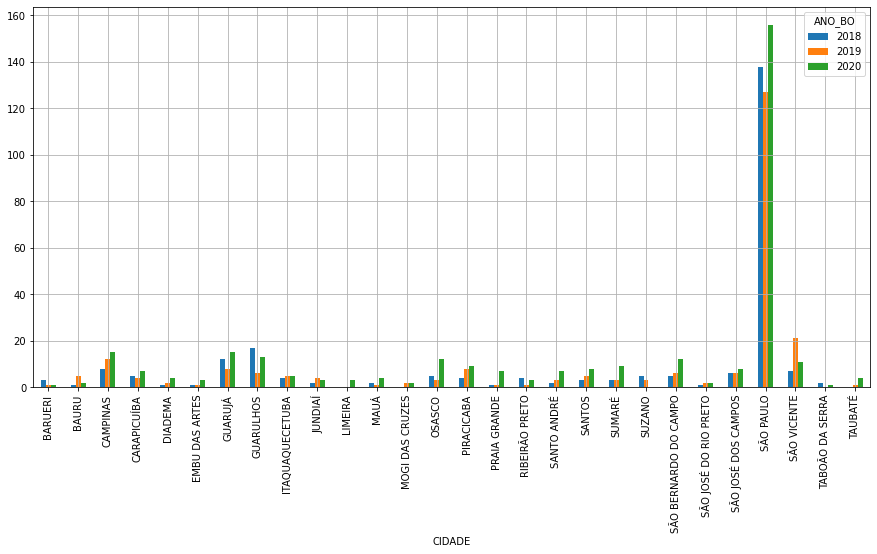

In [24]:
graf1.plot(kind='bar', figsize=(15,7), grid=True, legend=True)

Em gráfico, fica mais fácil visualizar, dentre os municípios com 250 mil habitantes ou mais, aqueles que tiveram aumento entre os períodos.

> O comando `plot()` é uma função de Pandas que herda de Matplotlib funcionalidades para plotar um gráfico a partir de um dataframe -- no caso, `graf1`.
>
> Aqui, usamos `kind='bar'` para mostrar um gráfico de barras, `figsize=(15,7)` para definir o tamanho do gráfico em polegadas, `grid=True` para trazer a grade que acompanha os eixos X e Y, e `legend=True` para exibir a legenda.

Porém a comparação entre essas cidades só é possível de maneira proporcional à população. Ou seja, precisamos calcular a taxa de mortos pela polícia em cada, digamos, 10 mil habitantes.

In [25]:
df250_expandido = df250.groupby(['CIDADE', 'ANO_BO']).agg(
    populacao=('populacao', 'mean'), 
    quantidade=('ANO_BO', 'size')
).reset_index()

> O dataframe `df250` tem todas as mortes nas cidades com 250 mil habitantes ou mais distribuídas em linhas. Também tem a população de cada um dos municípios em cada um dos anos.
>
> Ou seja, uma cidade com, digamos, 30 mortos aparecerá em 30 linhas, e a população da cidade naquele ano será repetida 30 vezes.
>
> Para calcularmos a quantidade de mortos no `groupby` usamos `size`, conforme visto anteriormente. E para calcularmos a população, uma vez que esse valor aparece repetidas vezes? Simples: usamos a média, `mean`.
>
> Para ilustrar: se uma cidade de 2 mil habitantes aparece em nove linhas, a informação de população (2000) aparecerá nove vezes. Se somarmos, teremos um valor errado, de 18 mil habitantes. Se tirarmos a média, teremos o valor verdadeiro: 2 mil.
>
> Portanto, ao criarmos o dataframe (`df250_expandido`) com contagem de óbitos e população, agrupamos o dataframe original (`df250`) por cidade e ano (`groupby(['CIDADE', 'ANO_BO'])`), e a ele agregamos (`agg()`) a média da população (`'populacao', 'mean'`, ao qual damos o nome de `populacao`) e a contagem de mortos -- ou a contagem de linhas a partir de uma coluna qualquer, como a de ano -- (`ANO_BO`, `size`, ao qual damos o nome de `quantidade`).
> 
> Daí temos:
>
> ```
> df250_expandido = df250.groupby(['CIDADE', 'ANO_BO']).agg(
>     populacao=('populacao', 'mean'), 
>     quantidade=('ANO_BO', 'size')
> )
> ```
>
> O comando `reset_index()`, conforme visto acima, reorganiza o dataframe.

In [26]:
df250_expandido.head(20)

,CIDADE,ANO_BO,populacao,quantidade
0,BARUERI,2018,259793,3
1,BARUERI,2019,262081,1
2,BARUERI,2020,264390,1
3,BAURU,2018,360478,1
4,BAURU,2019,362348,5
5,BAURU,2020,364225,2
6,CAMPINAS,2018,1158944,8
7,CAMPINAS,2019,1167192,12
8,CAMPINAS,2020,1175501,15
9,CARAPICUÍBA,2018,390010,5


In [27]:
df250_expandido['taxa'] = (df250_expandido['quantidade'] / df250_expandido['populacao']) * 10000

> A taxa por 10 mil habitantes segue a seguinte lógica: $\frac{mortos}{habitantes} \times 10000$.
>
> Logo, para o nosso dataframe, seria `(df250_expandido['quantidade'] / df250_expandido['populacao']) * 10000`.
> 
> Gravamos essa taxa numa coluna nova chamada `taxa`, dentro do dataframe `df250_expandido`.

In [28]:
df250_expandido.head(20)

,CIDADE,ANO_BO,populacao,quantidade,taxa
0,BARUERI,2018,259793,3,0.115477
1,BARUERI,2019,262081,1,0.038156
2,BARUERI,2020,264390,1,0.037823
3,BAURU,2018,360478,1,0.027741
4,BAURU,2019,362348,5,0.137989
5,BAURU,2020,364225,2,0.054911
6,CAMPINAS,2018,1158944,8,0.069028
7,CAMPINAS,2019,1167192,12,0.102811
8,CAMPINAS,2020,1175501,15,0.127605
9,CARAPICUÍBA,2018,390010,5,0.128202


In [29]:
graf2 = pd.pivot_table(df250_expandido, values='taxa', index='CIDADE', columns='ANO_BO')

graf2

ANO_BO,2018,2019,2020
CIDADE,,,
BARUERI,0.115477,0.038156,0.037823
BAURU,0.027741,0.137989,0.054911
CAMPINAS,0.069028,0.102811,0.127605
CARAPICUÍBA,0.128202,0.101964,0.177396
DIADEMA,0.024928,0.049651,0.098893
EMBU DAS ARTES,0.037766,0.037345,0.110787
GUARUJÁ,0.385693,0.254975,0.474076
GUARULHOS,0.128229,0.044828,0.096205
ITAQUAQUECETUBA,0.110969,0.136803,0.134920


<AxesSubplot:xlabel='CIDADE'>

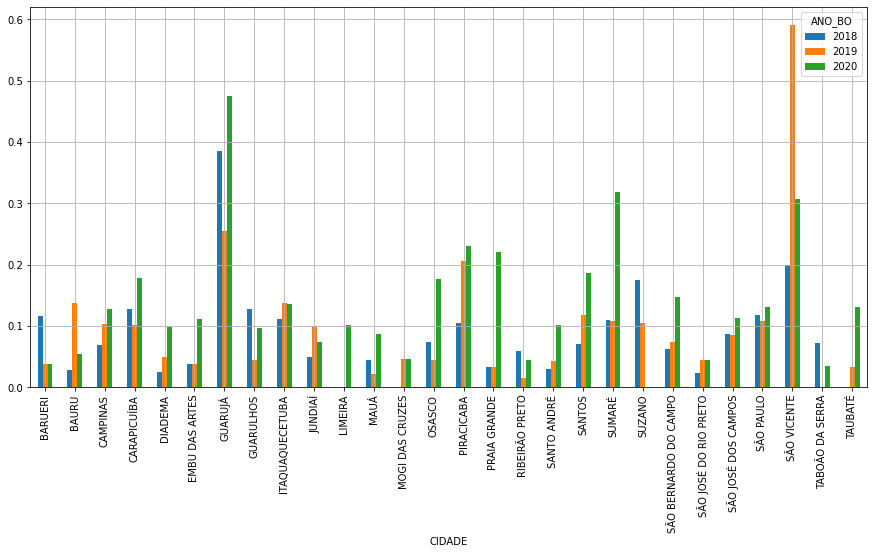

In [30]:
graf2.plot(kind='bar', figsize=(15,7), grid=True, legend=True)

Tomando a taxa de mortes pela polícia a cada 10 mil habitantes, vemos que Guarujá, em 2020, é uma cidade que se destaca.

> Acima temos o gráfico das taxas por ano e cidade. Seguimos a mesma lógica e os mesmos comandos do gráfico anterior.

Contudo, essa comparação entre cidades não mostra, de maneira precisa, a evolução no tempo -- ou seja, se de um período a outro, quanto a taxa em determinada cidade aumentou ou caiu.

Vamos comparar a taxa nos anos.

In [31]:
graf3 = graf2.pct_change(axis='columns')

graf3

ANO_BO,2018,2019,2020
CIDADE,,,
BARUERI,NaN,-0.669577,-0.008733
BAURU,NaN,3.974196,-0.602061
CAMPINAS,NaN,0.489400,0.241164
CARAPICUÍBA,NaN,-0.204664,0.739795
DIADEMA,NaN,0.991788,0.991772
EMBU DAS ARTES,NaN,-0.011144,1.966553
GUARUJÁ,NaN,-0.338917,0.859302
GUARULHOS,NaN,-0.650408,1.146106
ITAQUAQUECETUBA,NaN,0.232804,-0.013759


<AxesSubplot:xlabel='CIDADE'>

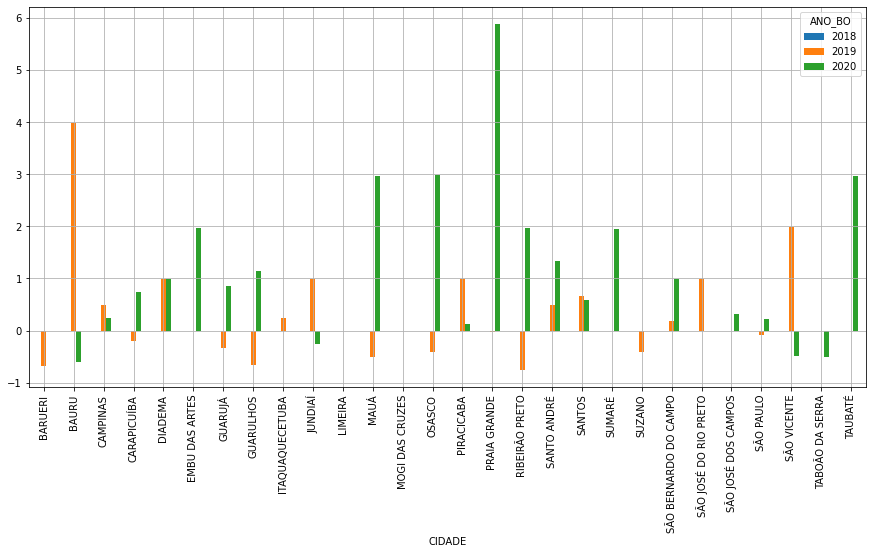

In [32]:
graf3.plot(kind='bar', figsize=(15,7), grid=True, legend=True)

Com a variação percentual, observamos que, de 2019 a 2020, 18 das 28 cidades tiveram aumento na taxa de letalidade policial, com destaque para Praia Grande. Além disso, a cidade de Limeira, que não contabilizou mortes em 2019, passou a contabilizar em 2020 -- e não consta na variação percentual porque não tem como calcular aumento percentual quando o valor anterior é 0.

> Aqui utilizamos funções já conhecidas. A única diferença foi em `pct_change`, que recebeu o argumento `axis='columns'` -- ou seja, calcular a diferença percentual entre colunas, não entre linhas.

Agora que temos um retrato da letalidade da PM por município e ano, vamos perfilar quem são as vítimas, especificamente a média de idade e a cor.

In [33]:
obitos.groupby('ANO_BO').agg({'IDADE': 'mean'})

,IDADE
ANO_BO,
2018,17.858974
2019,19.472141
2020,17.922018


No geral, vemos que as vítimas, em 2020, não chegaram à maioridade. Mas será que existe diferença na média de idade por cor? Vamos pegar os dados de 2020 e ver...

In [34]:
cor_idade = obitos[obitos['ANO_BO'] == 2020]

cor_idade.groupby('CORCUTIS').agg(
    quantidade=('CORCUTIS', 'size'), 
    idade_media=('IDADE', 'mean')
).reset_index()

,CORCUTIS,quantidade,idade_media
0,Amarela,1,22.000000
1,Branca,151,20.271523
2,Parda,222,17.252252
3,Preta,37,18.324324


Observamos que, em 2020, as vítimas pardas e pretas são mais jovens que as brancas.

#### CONCLUSÕES

1. No primeiro semestre de 2020, policiais militares em serviço assassinaram 436 pessoas no estado. Isso representa aumento de 27,86% em relação ao mesmo período de 2019.

2. Das 436 mortes no primeiro semestre de 2020, 156 foram na capital. Porém, quando consideramos municípios com mais de 250 mil habitantes e calculamos a taxa de mortes por 10 mil habitantes, Guarujá se destaca: 0,47. Foram 15 mortes no primeiro semestre de 2020, contra 8 no mesmo período de 2019.

3. Dentre os 28 municípios com mais de 250 mil habitantes, 18 apresentaram aumento na taxa, em relação a 2019. Destacam-se a) Praia Grande, cujo aumento foi de 5,88%, e b) Limeira, que não teve mortos em 2018 e 2019, e em 2020 contabiliza três.

4. Em geral, as vítimas não chegaram à maioridade. A média de idade neste ano é de 17,9 anos.

5. Vítimas pardas e pretas são mais jovens que brancas.